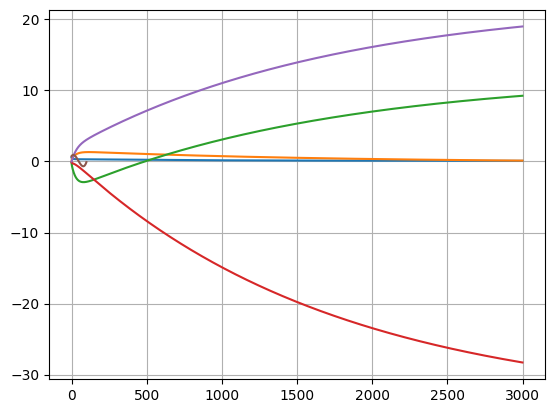

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MSE
L=100
tk = np.arange(0,1,0.01)
no_of_inputs = 3
W = np.zeros(no_of_inputs+1)
eta = 0.09
iterations = 3000

noise = np.random.normal(0,np.sqrt(0.09),tk.size)
function = np.sin(2*np.pi*tk)+noise

MSE = np.zeros(iterations)
x = np.zeros((L, no_of_inputs+1))
for i in range(L):
    for j in range(no_of_inputs+1):
        x[i,j] = tk[i]**j

W =  np.array([np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1)]).T
for i in range(iterations):
    for j in range(L-1):
        e = (function[j]-W[0].T @ x[j])
        W[0] = W[0] + eta *e*x[j]
        W[i+1] = W[0]
    MSE[i] = np.mean((function-x @ W[0].T)**2)

plt.plot(MSE)
plt.plot(W[1:])
plt.plot(W[1000] @ x.T)
plt.grid()
print()


In [3]:
#stochastic gradient descent
eta = 0.09
iterations = 1000
W =  np.array([np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1),np.zeros(iterations+1)]).T
for i in range(iterations):
    error = function[j]-W[i].T @ x[j]
    W[i+1] = W[i] - eta*error



error backpropagation
1. Apply an input vector xn to the network and forward propagate through
   the network using (5.48) and (5.49) to find the activations of all the hidden
   and output units.

2. Evaluate the δk for all the output units using (5.54)

3. Backpropagate the δ’s using (5.56) to obtain δj for each hidden unit in the
   network.

4. Use (5.53) to evaluate the required derivatives.


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

I = np.identity(3)



In [5]:
N = 50
eta = 0.09

x = np.column_stack([np.ones(50),np.linspace(-1,1,N)])

y1 = x[:,1]**2
y2 = np.sin(x[:,1])
y3 = np.abs(x[:,1])
y4 = np.heaviside(x[:,1],0)


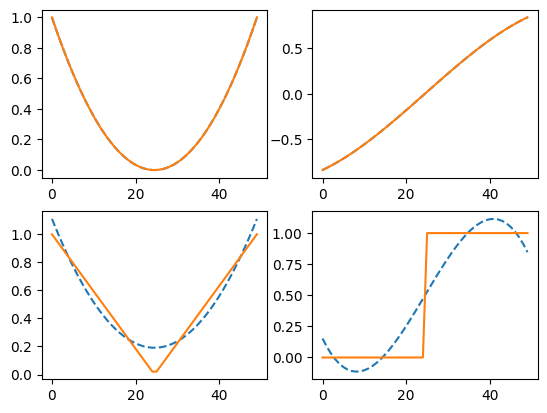

In [6]:
sigma=0.1
V = np.random.normal(0,sigma,(3,2))


phi = np.tanh(x@V.T)
phi = np.array([np.ones(50),phi[:,0],phi[:,1],phi[:,2]]).T
W1 = np.linalg.pinv(phi)@y1
W2 = np.linalg.pinv(phi)@y2
W3 = np.linalg.pinv(phi)@y3
W4 = np.linalg.pinv(phi)@y4

ytk_1= W1@phi.T
ytk_2= W2@phi.T
ytk_3= W3@phi.T
ytk_4= W4@phi.T


#plot 1:
plt.subplot(2, 2, 1)
plt.plot(ytk_1,linestyle="dashed")
plt.plot(y1)

#plot 2:
plt.subplot(2, 2, 2)
plt.plot(ytk_2,linestyle="dashed")
plt.plot(y2)

#plot 3:
plt.subplot(2, 2, 3)
plt.plot(ytk_3,linestyle="dashed")
plt.plot(y3)

#plot 4:
plt.subplot(2, 2, 4)
plt.plot(ytk_4,linestyle="dashed")
plt.plot(y4)

plt.show()

Neural Network

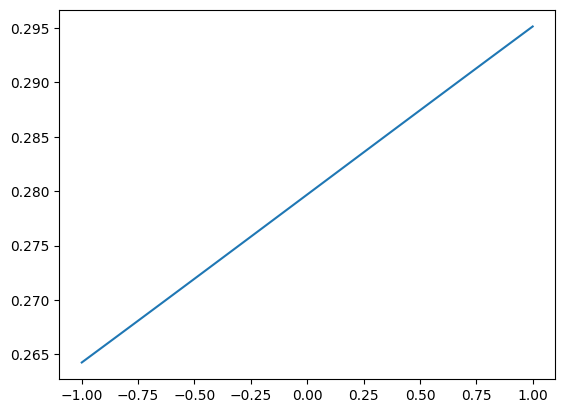

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def NN(x,y,eta,V,W):
    for i in range(len(x)):
        pattern = x[i].reshape((1,2))

        aj = (V @ pattern[0])
        zj = np.hstack((1,np.tanh(aj)))

        yk = W@zj
        dk = yk - y[i]
        dj = ((1-zj**2)*W*dk.T)[:,1:]   

        V = V - eta*dj.T@pattern
        W = W - eta*dk*zj

    return V,W
sigma = 0.1

V= np.random.normal(0,sigma,(3,2))
W = np.random.normal(0,sigma,(1,4))
x = np.column_stack([np.ones(50),np.linspace(-1,1,50)])

y1 = x[:,1]**2
bias = np.ones(50)
y2 = np.sin(x[:,1])
y3 = np.abs(x[:,1])
y4 = np.heaviside(x[:,1],0)
yk_arr = []
V,W = NN(x,y1,0.09,V,W)
for i in range(1):
    V,W = NN(x,y1,0.09,V,W)
    aj = (V @x.T)
    zj = np.column_stack((np.ones((50)),np.tanh(aj).T))
    yk = W@zj.T
    yk = yk[0]
    yk_arr.append(yk)


yk_arr = np.array(yk_arr)
yk_arr = np.mean(yk_arr**2,axis=0)
plt.plot(x[:,1],yk_arr)
print()

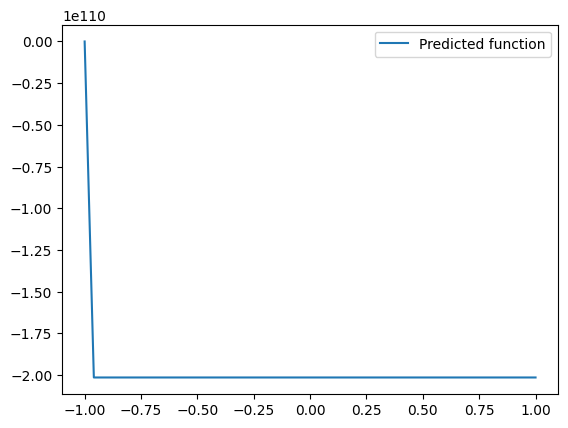

In [38]:
import numpy as np
import matplotlib.pyplot as plt
eta = 0.09
sigma=0.1

bias = np.ones(50)
x = np.linspace(-1,1,50)

y1 = x**2
y2 = np.sin(x)
y3 = np.abs(x)
y4 = np.heaviside(x,0)

y1 = np.reshape(y1,(50,1))

input = np.column_stack([bias,x])

W1 = np.random.normal(0,sigma,(3,2))
W2 = np.random.normal(0,sigma,(1,4))



# for i in range(10000):
# aj = (W1@input.T).T
# zj = np.column_stack([bias,np.tanh(aj)])
# y_pred = W2@zj.T

# y_pred = y_pred.T

# delta_k = y1-y_pred

# dY_pred = (1-zj**2)

# delta_j = dY_pred@W2.T

# dW2 = delta_k.T@zj
# dW1 = delta_j.T@input


# Define the input and output data
x = np.linspace(0, 2*np.pi, 50).reshape(-1, 1)
bias = np.ones(50)
x = np.linspace(-1,1,50)
input = np.column_stack([bias,x])
y = np.sin(x).reshape(-1, 1)

# Define the neural network architecture
input_size = 2
hidden_size = 4
output_size = 1

# Initialize the weights and biases randomly
w1 = np.random.randn(input_size, hidden_size)

w2 = np.random.randn(hidden_size, output_size)


# Define the learning rate
eta = 0.09

# Perform the forward pass and backpropagation for each epoch
for epoch in range(132):
    # Forward pass
    a1 = np.tanh(np.dot(input, w1))
    y_pred = np.dot(a1, w2)

    # Calculate the error
    error = y_pred - y

    # Backpropagation
    delta2 = error
    delta1 = np.dot(delta2, w2.T) * (1 - a1**2)

    # Update the weights and biases
    w2 -= eta * np.dot(a1.T, delta2)

    w1 -= eta * np.dot(x.T, delta1)


# Predict the output for the input data
a1 = np.tanh(np.dot(input, w1))
y_pred = np.dot(a1, w2)

# Plot the predicted function
#plt.plot(x, y, label='True function')
plt.plot(x, y_pred, label='Predicted function')
plt.legend()
plt.show()